In [3]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('WFCstocks.csv', index_col= 'Date', parse_dates=['Date'])['Close']

In [5]:
def plot_predictions(real, predicted, look_back_len, prediction_len, name = 'WFC'):
  plt.figure(figsize = (20, 12))
  plt.plot(real, color = 'blue', label = 'True price')
  for i in range(predicted.shape[0]):
    plt.plot(range(look_back_len + i, look_back_len + i + prediction_len), predicted[i], color = 'red', label = 'Predicted price')
  plt.grid()
  plt.title('Real and predicted prices of {}'.format(name))
  plt.xlabel('Days')
  plt.ylabel('Value')
  plt.show()

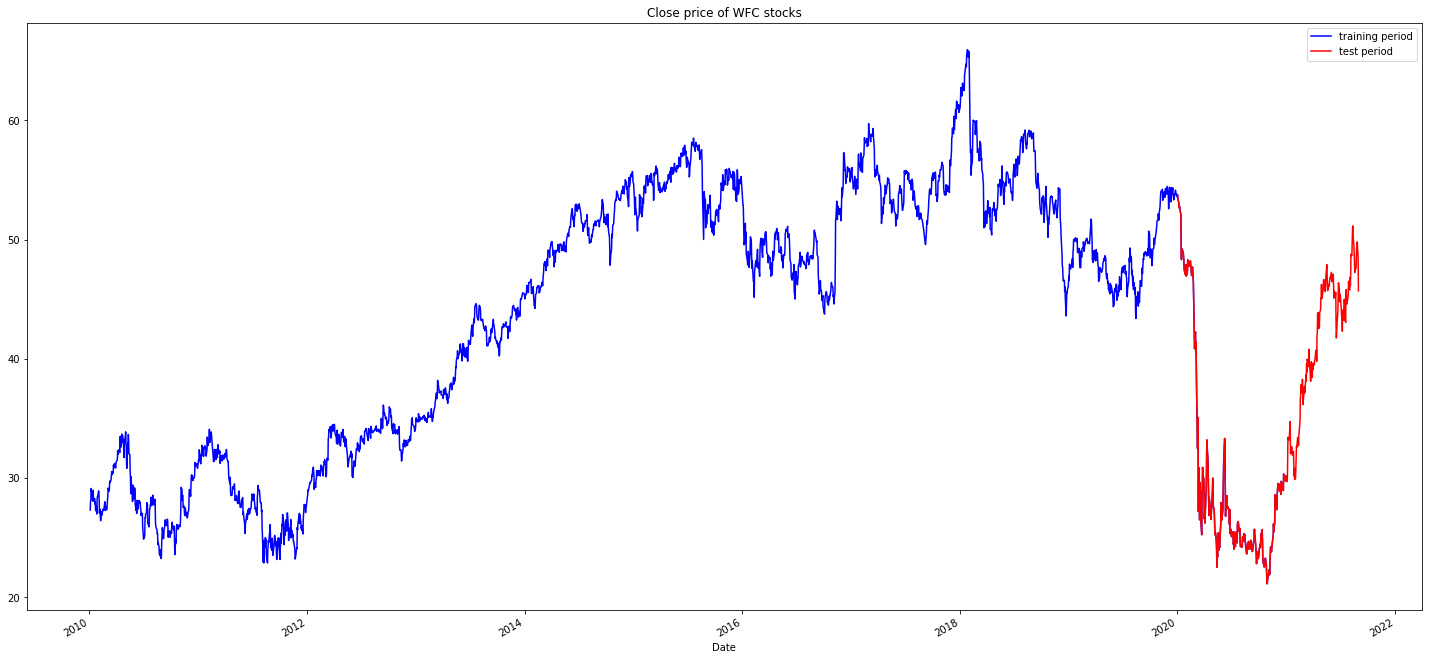

In [6]:
learn_until = '2020'
train_data = data[:learn_until, ].values
test_data = data[learn_until:,].values
data[:learn_until,].plot(figsize = (25, 12), color = 'blue')
data[learn_until:,].plot(figsize = (25, 12), color = 'red')
plt.legend(['training period', 'test period'])
plt.title('Close price of WFC stocks')
plt.show()

In [7]:
data_train_scaled = MinMaxScaler(feature_range = (0, 1)).fit_transform(train_data.reshape(-1, 1))

In [8]:
look_back = 60
predict_window = 10
x_train, y_train = [], []
for i in range(len(train_data) - (look_back + predict_window)):
  x_train.append(data_train_scaled[i: i + look_back])
  y_train.append(data_train_scaled[i + look_back : i + look_back + predict_window])
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
model = Sequential()
model.add(layer = layers.LSTM(128, input_shape = (look_back, 1), return_sequences = True))
model.add(layer = layers.LSTM(64, input_shape = (128, 1)))
model.add(layers.Dense(predict_window))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [10]:
model.fit(x_train, y_train, epochs = 10,batch_size = 32, validation_split = 0.1)


Epoch 1/10
76/76 [==============================] - 12s 104ms/step - loss: 0.0803 - val_loss: 0.0594
Epoch 2/10
76/76 [==============================] - 7s 93ms/step - loss: 0.0322 - val_loss: 0.0515
Epoch 3/10
76/76 [==============================] - 7s 92ms/step - loss: 0.0299 - val_loss: 0.0540
Epoch 4/10
76/76 [==============================] - 7s 92ms/step - loss: 0.0292 - val_loss: 0.0490
Epoch 5/10
76/76 [==============================] - 7s 93ms/step - loss: 0.0289 - val_loss: 0.0479
Epoch 6/10
76/76 [==============================] - 7s 94ms/step - loss: 0.0305 - val_loss: 0.0491
Epoch 7/10
76/76 [==============================] - 7s 93ms/step - loss: 0.0277 - val_loss: 0.0505
Epoch 8/10
76/76 [==============================] - 7s 93ms/step - loss: 0.0283 - val_loss: 0.0483
Epoch 9/10
76/76 [==============================] - 7s 94ms/step - loss: 0.0273 - val_loss: 0.0482
Epoch 10/10
76/76 [==============================] - 7s 93ms/step - loss: 0.0270 - val_loss: 0.0485


In [11]:
scaler = MinMaxScaler(feature_range = (0, 1))
data_test_scaled  = scaler.fit_transform(test_data.reshape(-1, 1))
x_test, y_test = [], []
for i in range(len(test_data) - (look_back + predict_window)):
  x_test.append(data_test_scaled[i: i + look_back])
  y_test.append(data_test_scaled[i + look_back : i + look_back + predict_window])
x_test, y_test = np.array(x_test), np.array(y_test)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = y_test.reshape((350, 10))

In [12]:
#Рассмотрим ошибку на predict_window промежутках и усредним ее
mae_errors, rmse_errors = [], []
for i in range(predictions.shape[0]):
  mae_errors.append(np.mean(np.abs(predictions[i] - test_data[i + look_back : i + look_back + predict_window])))
  rmse_errors.append(np.sqrt(np.mean((predictions[i] - test_data[i + look_back : i + look_back + predict_window])**2)))
print('Average MAE on', predict_window, 'days period = ', np.array(mae_errors).mean())
print('Average RMSE on', predict_window, 'days period = ', np.array(rmse_errors).mean())

Average MAE on 10 days period =  1.6033733857214358
Average RMSE on 10 days period =  1.8091003446090248


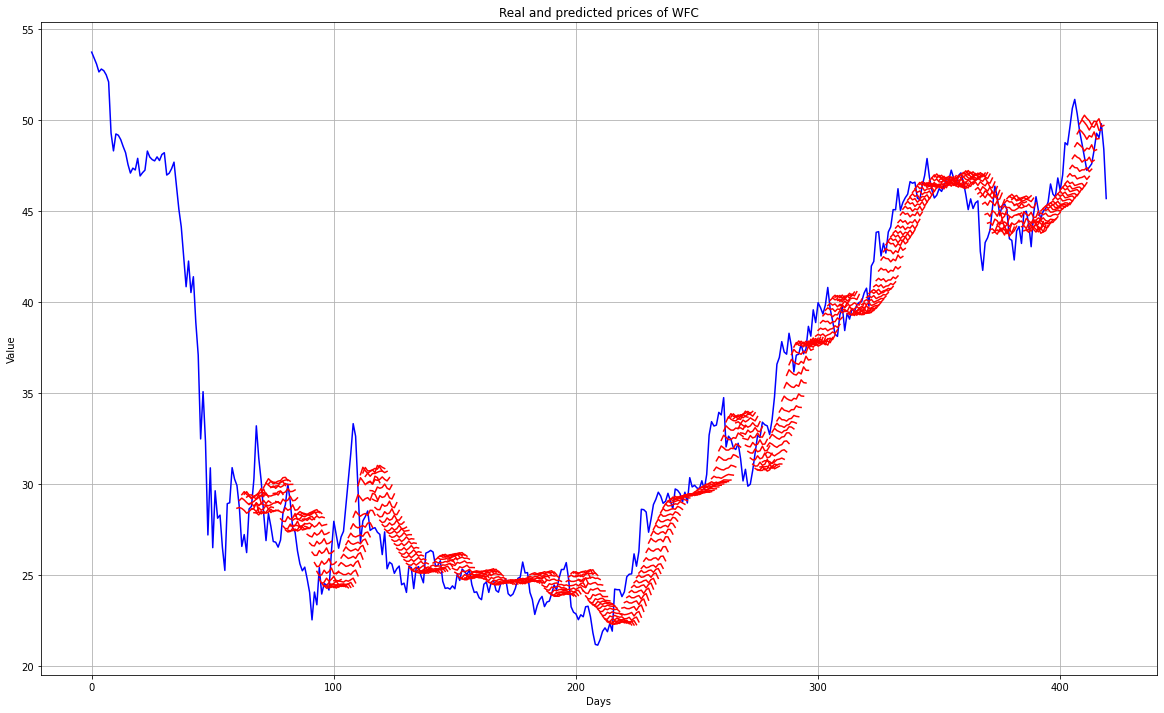

In [13]:
plot_predictions(test_data, predictions, look_back, predict_window)

'04-01-2010'